**Titanic Dataset is used from kaggle for classifying where a person will survive or not using Random Forest Algorithm**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/titanic ds/train.csv') # dataset is imported 
print(ds)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


**1. Data Exploration**

In [4]:
ds.info() # to find detail about the column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# To get statistics for all the columns at the same time
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
ds.shape # returns a tuple containing the dimensions (rows x columns) of a dataframe.

(891, 12)

In [14]:
ds.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [7]:
ds.skew() #skewness

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [8]:
ds.kurtosis() #kurtosis

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

In [9]:
cr = ds.corr() #correlation between two coloumns
print(cr)

             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  ... -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


In [10]:
ds["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

2.Visulaisation

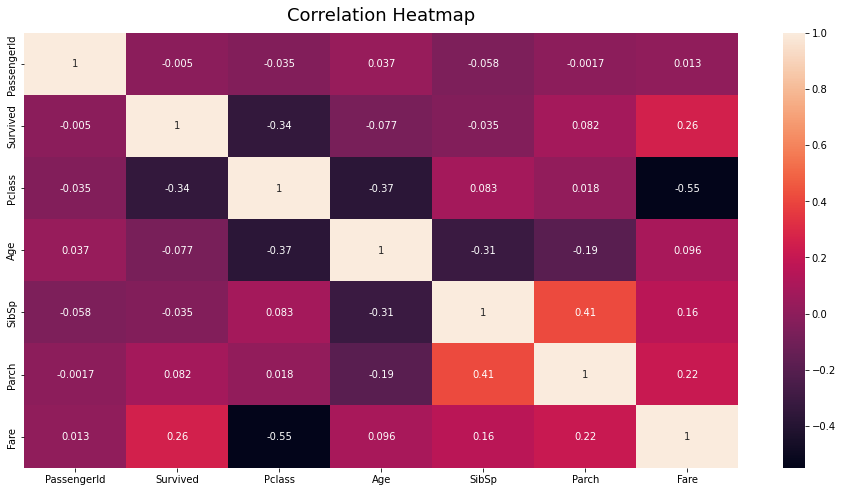

In [12]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(cr, annot = True) # by default pearson correlation
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [17]:
ag = pd.cut(ds['Age'], bins=[0, 20, 40, 60, 81])

In [18]:
dk=ds.groupby(ag).Survived.mean() # grouped the high column data according to year to draw pie chart
print(dk)

Age
(0, 20]     0.458101
(20, 40]    0.397403
(40, 60]    0.390625
(60, 81]    0.227273
Name: Survived, dtype: float64


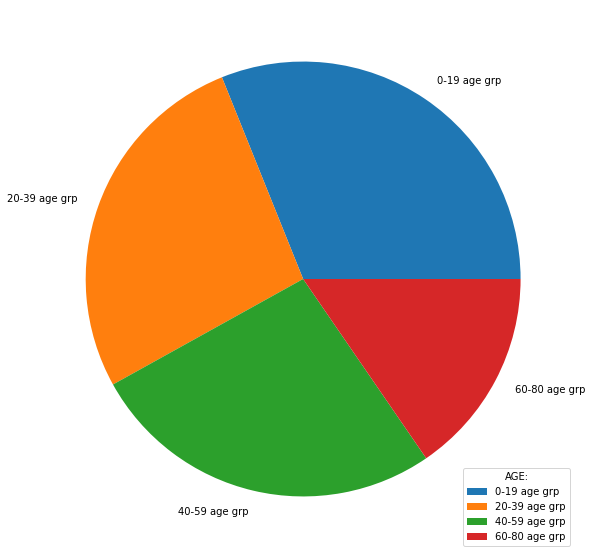

In [20]:
label=['0-19 age grp','20-39 age grp','40-59 age grp','60-80 age grp']
plt.pie(dk,labels=label)
plt.legend(title = "AGE:")
plt.rcParams["figure.figsize"] = (8,10)
plt.show()

In [21]:
dg=ds.groupby(['Sex']).Survived.mean() # grouped the high column data according to year to draw pie chart
print(dg)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survival rate by Gender')

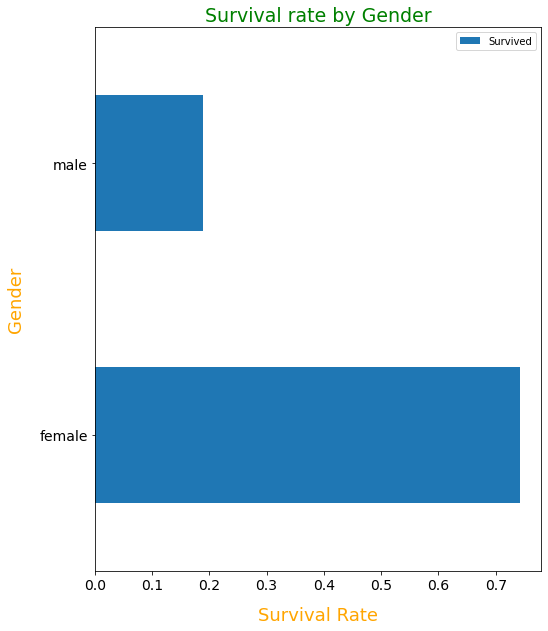

In [35]:
dg.plot(kind = 'barh',legend='reverse',fontsize=14)
plt.ylabel("Gender", labelpad=14, fontsize=18, color='orange')
plt.xlabel("Survival Rate", labelpad=14, fontsize=18, color='orange')
plt.title(label="Survival rate by Gender",fontsize=19, color='green')

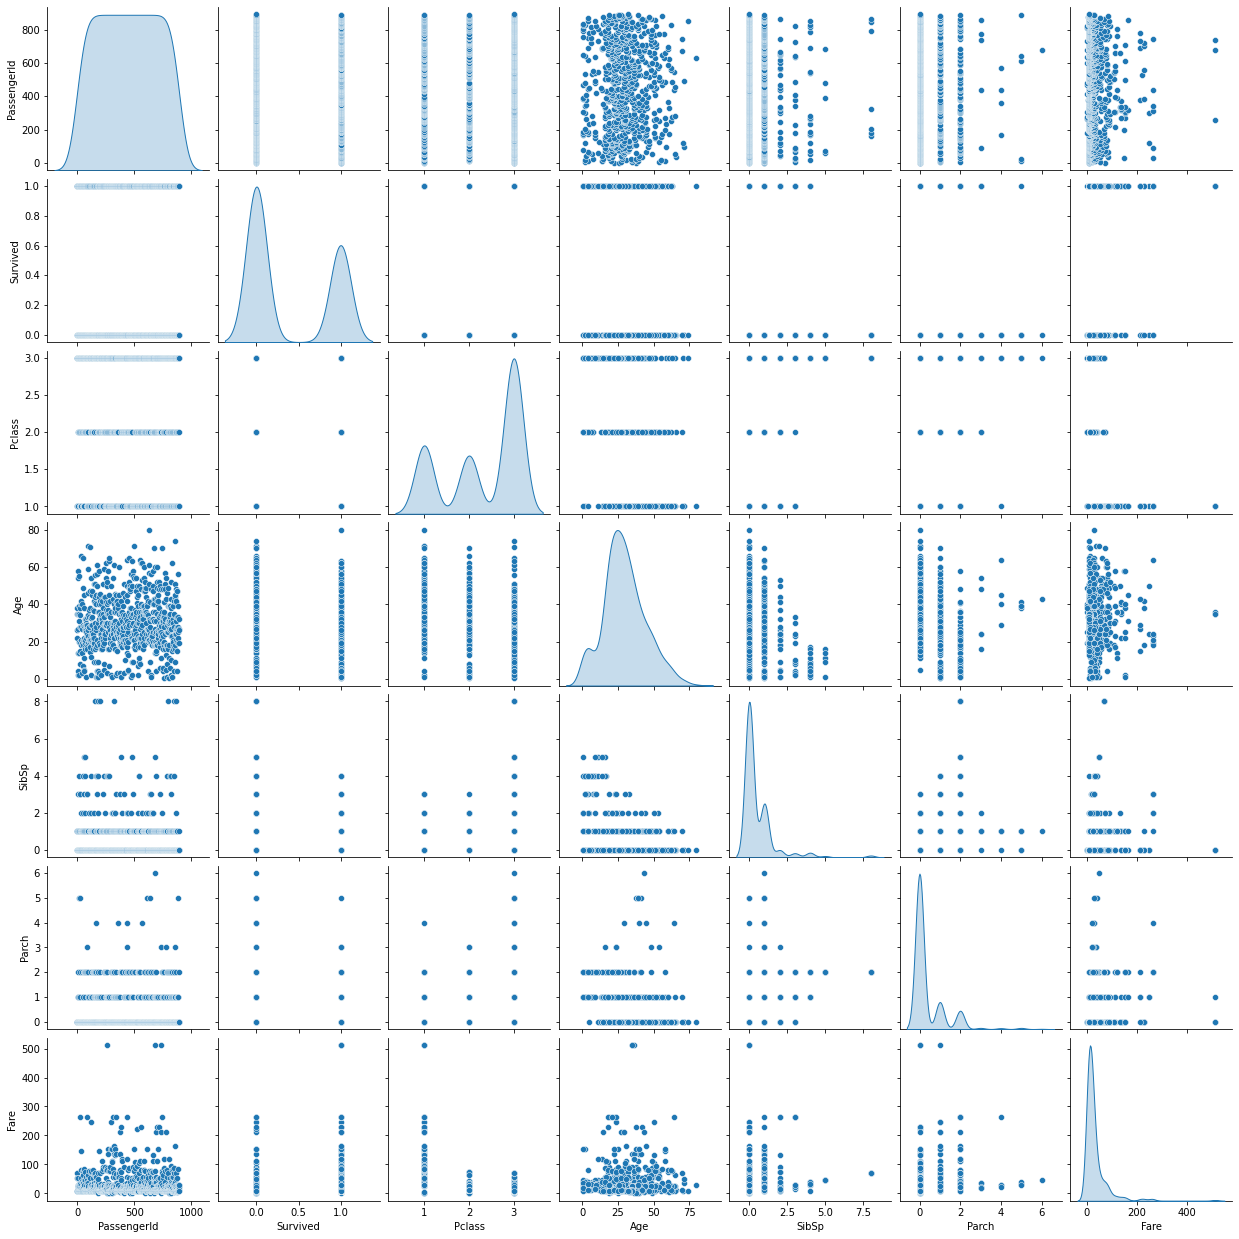

In [36]:
sns.pairplot(ds, diag_kind ='kde')

3.Data Preparation 

In [37]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
ds.nunique() # to find no. of unique value in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [39]:
ds.isnull().sum() #to check if any null value is there

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
ds[ds.duplicated(keep=False)] # to check for duplicate value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [43]:
#Removing Max Unique data columns PassengerID, Name, Ticket
#Removing rows with blank values
ds = ds.dropna(subset = ['Embarked' , 'Age', 'Cabin'])
ds = ds.drop(['PassengerId' , 'Name' , 'Ticket'],axis=1)

In [44]:
#Converting float data type into int data type
ds['Fare'] = ds['Fare'].astype(int)
ds['Age'] = ds['Age'].astype(int)

In [45]:
s_col = ds.select_dtypes(include='object')
print(s_col)
s_col.info()

        Sex        Cabin Embarked
1    female          C85        C
3    female         C123        S
6      male          E46        S
10   female           G6        S
11   female         C103        S
..      ...          ...      ...
871  female          D35        S
872    male  B51 B53 B55        S
879  female          C50        C
887  female          B42        S
889    male         C148        C

[183 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       183 non-null    object
 1   Cabin     183 non-null    object
 2   Embarked  183 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for c in s_col:
    ds[c] = label.fit_transform(ds[c])

In [47]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,0,38,1,0,71,72,0
3,1,1,0,35,1,0,53,48,2
6,0,1,1,54,0,0,51,117,2
10,1,3,0,4,1,1,16,131,2
11,1,1,0,58,0,0,26,43,2


#Build model

In [48]:
#Splitting the data into independent variable 'X' and dependent variable 'Y'
X= ds.iloc[:,1:8].values
Y = ds.iloc[:,0].values

In [49]:
#Building train and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [50]:
#Feature scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200,criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
fpred= forest.predict(X_test)
fpred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print("Accuracy:\n",accuracy_score(y_test, fpred))
print("-------------")
print("Precision:\n",precision_score(y_test, fpred))
print("-------------")
print("Recall:\n",recall_score(y_test, fpred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, fpred)

Accuracy:
 0.7272727272727273
-------------
Precision:
 0.7941176470588235
-------------
Recall:
 0.7714285714285715
-------------
Confusion Matrix:


array([[13,  7],
       [ 8, 27]])

**HyperTuning the parameters**

In [54]:
n_estimators = [int(x) for x in range(150,1901,75)]
max_features = ['auto','log2', 'sqrt']
max_depth = [int(x) for x in range(1,70,11)]
max_depth.append(None)
min_samples_split = list(range(2,25))
min_samples_leaf = list(range(2,25))
bootstrap = [True, False]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

rprams={'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth, 'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
rforest= RandomForestClassifier(random_state=45)
rf_cv = RandomizedSearchCV(estimator=rforest, scoring='accuracy',param_distributions=rprams, n_iter=150, cv=3,verbose=2, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

arforest= RandomForestClassifier(**rf_best_params)
arforest.fit(x_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  9.3min finished


Best paramters: {'n_estimators': 975, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 34, 'bootstrap': False})


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=34, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=975,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
afpred=arforest.predict(x_test)

In [57]:
print("After hyperparameter tuning:")
print("Accuracy:\n",accuracy_score(y_test, afpred))
print("-------------")
print("Precision:\n",precision_score(y_test, afpred))
print("-------------")
print("Recall:\n",recall_score(y_test, afpred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, afpred)

After hyperparameter tuning:
Accuracy:
 0.8
-------------
Precision:
 0.8157894736842105
-------------
Recall:
 0.8857142857142857
-------------
Confusion Matrix:


array([[13,  7],
       [ 4, 31]])

5.Validation curve of different hyper parameters

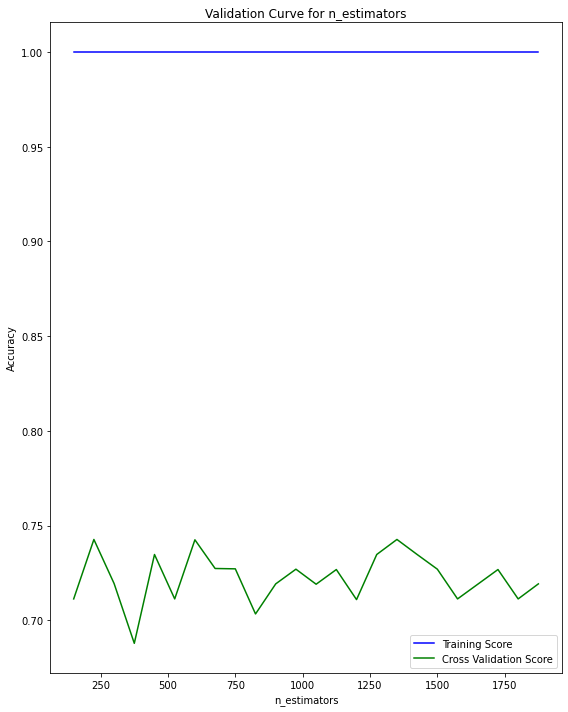

In [58]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = n_estimators, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(n_estimators, mean_train_score,label = "Training Score", color = 'b')
plt.plot(n_estimators, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

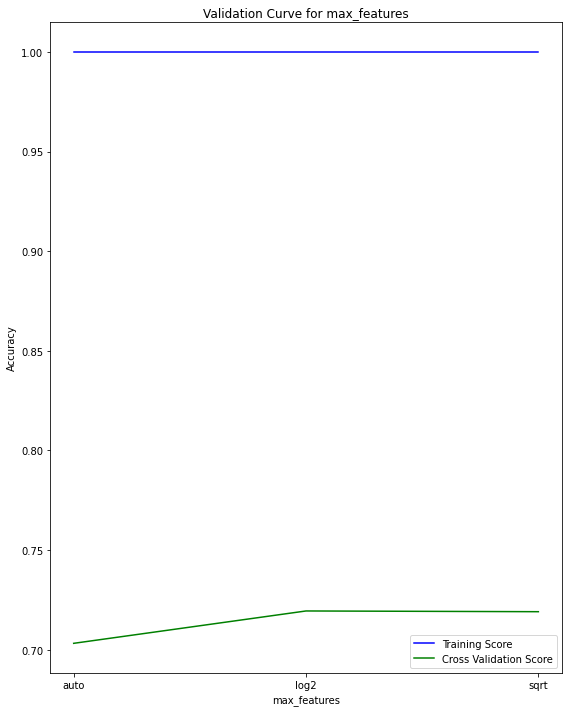

In [59]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = max_features, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(max_features, mean_train_score,label = "Training Score", color = 'b')
plt.plot(max_features, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_features")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

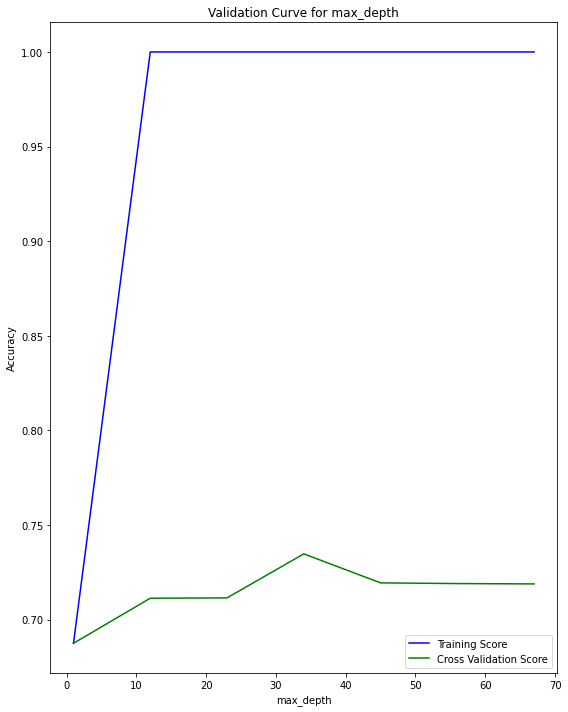

In [60]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = max_depth, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(max_depth, mean_train_score,label = "Training Score", color = 'b')
plt.plot(max_depth, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

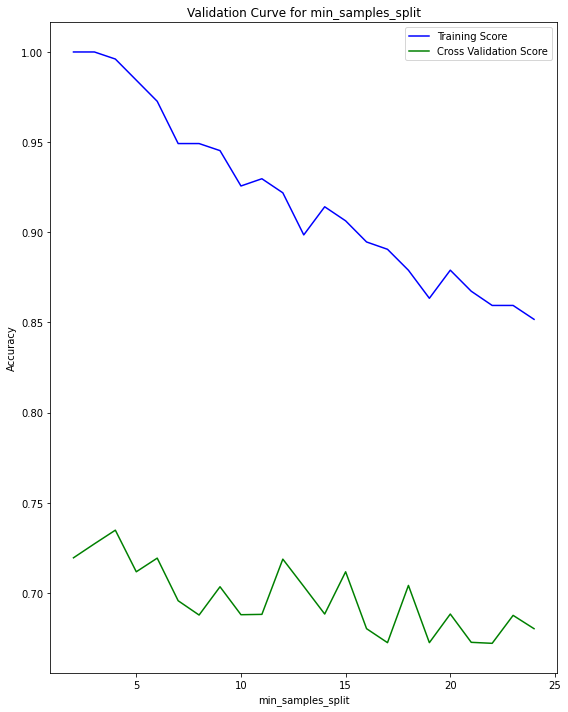

In [61]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = min_samples_split, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(min_samples_split, mean_train_score,label = "Training Score", color = 'b')
plt.plot(min_samples_split, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

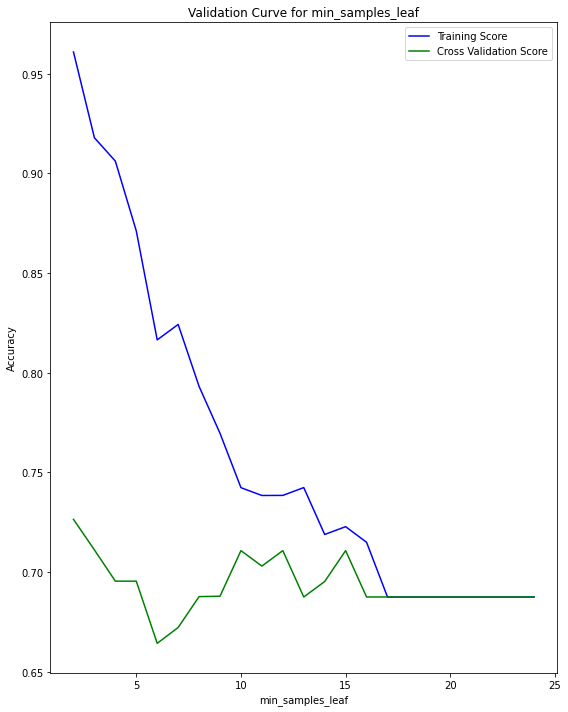

In [62]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = min_samples_leaf, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(min_samples_leaf, mean_train_score,label = "Training Score", color = 'b')
plt.plot(min_samples_leaf, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

Comparing Random Forest and Hyper Tuned Random forest model.

In [63]:
from sklearn.metrics import mean_absolute_error
print("MAE for forest:",mean_absolute_error(y_test, fpred))
print("MAE for Hyper forest:",mean_absolute_error(y_test, afpred))

MAE for forest: 0.2727272727272727
MAE for Hyper forest: 0.2


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
print("1.Random Forest:\n")
kfold_cv = KFold(n_splits=10, random_state=45, shuffle=True)
kfold_scores = cross_val_score(forest,X_train, y_train, cv = kfold_cv)
print("k-fold score -",kfold_scores)
print("\n------------\n")
cross_validation_accuracy = np.mean(kfold_scores)
print("Cross Validation Accuracy -",cross_validation_accuracy)
print("\n2.Hyper Tuned Random Forest:")
kfold_cvf = KFold(n_splits=10, random_state=45, shuffle=True)
kfold_scoresf = cross_val_score(arforest,X_train, y_train, cv = kfold_cvf)
print("\nk-fold score -",kfold_scoresf)
print("\n------------\n")
cross_validation_accuracyf = np.mean(kfold_scoresf)
print("Cross Validation Accuracy -",cross_validation_accuracyf)

1.Random Forest:

k-fold score - [0.61538462 0.76923077 0.76923077 0.69230769 0.53846154 0.61538462
 0.84615385 0.61538462 0.66666667 0.58333333]

------------

Cross Validation Accuracy - 0.6711538461538462

2.Hyper Tuned Random Forest:

k-fold score - [0.61538462 0.76923077 0.76923077 0.69230769 0.61538462 0.61538462
 0.76923077 0.61538462 0.75       0.58333333]

------------

Cross Validation Accuracy - 0.6794871794871795


In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
#tree
t_fpr, t_tpr, _ = roc_curve(y_test, fpred)
t_auc = roc_auc_score(y_test, fpred)
#forest
f_fpr, f_tpr, _ = roc_curve(y_test, afpred)
f_auc = roc_auc_score(y_test, afpred)

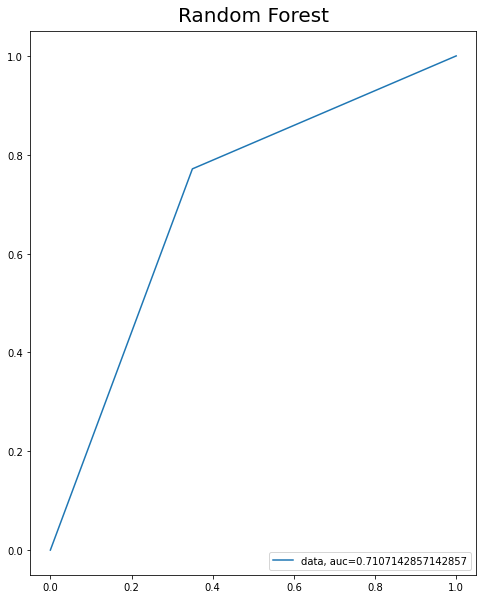

In [65]:
plt.plot(t_fpr,t_tpr,label="data, auc="+str(t_auc))
plt.legend(loc=4)
plt.title('Random Forest',fontdict={'fontsize':20},pad=10)
plt.show()

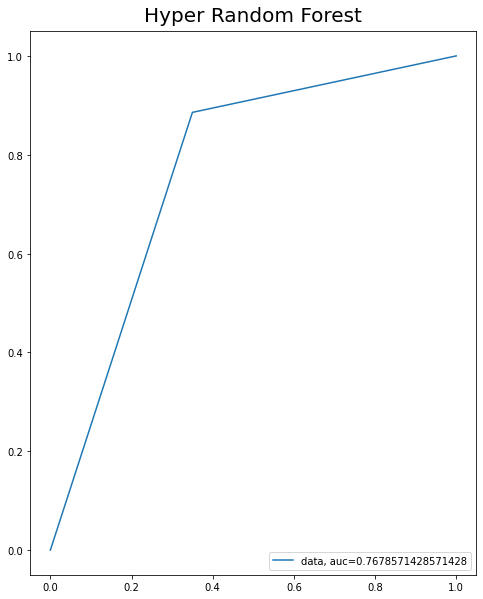

In [66]:
plt.plot(f_fpr,f_tpr,label="data, auc="+str(f_auc))
plt.legend(loc=4)
plt.title('Hyper Random Forest',fontdict={'fontsize':20},pad=10)
plt.show()